# **1. Perkenalan Dataset**


This dataset is adapted from the Wine Data Set from https://archive.ics.uci.edu/ml/datasets/wine by removing the information about the types of wine for unsupervised learning.

The following descriptions are adapted from the UCI webpage:

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are:

* Alcohol
* Malic acid
* Ash
* Alcalinity of ash
* Magnesium
* Total phenols
* Flavanoids
* Nonflavanoid phenols
* Proanthocyanins
* Color intensity
* Hue
* OD280/OD315 of diluted wines
* Proline

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

# Ignore warnings, they are mostly about future deprecations
warnings.filterwarnings("ignore", message="X does not have valid feature names")


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
# Load the dataset
data = pd.read_csv('wine-clustering.csv')  # Replace with the actual path to the dataset
data


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
# Explore the data
print(data.describe())

          Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000      

In [ ]:
print("Shape of the dataframe",data.shape)
print("duplicated Value count",data.duplicated().sum())
analys = pd.DataFrame({
    'Unique':data.nunique(),
    'Null':data.isna().sum(),
    'NullPercent':data.isna().sum() / len(data),
    'Type':data.dtypes.values

})
display(analys)

Shape of the dataframe (178, 13)
duplicated Value count 0


,Unique,Null,NullPercent,Type
Alcohol,126,0,0.0,float64
Malic_Acid,133,0,0.0,float64
Ash,79,0,0.0,float64
Ash_Alcanity,63,0,0.0,float64
Magnesium,53,0,0.0,int64
Total_Phenols,97,0,0.0,float64
Flavanoids,132,0,0.0,float64
Nonflavanoid_Phenols,39,0,0.0,float64
Proanthocyanins,101,0,0.0,float64
Color_Intensity,132,0,0.0,float64


<ipython-input-17-d07b00a868bc>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data = data , x = i , kde = True, palette="bright",color="purple" )
<ipython-input-17-d07b00a868bc>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data = data , x = i , kde = True, palette="bright",color="purple" )
<ipython-input-17-d07b00a868bc>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data = data , x = i , kde = True, palette="bright",color="purple" )
<ipython-input-17-d07b00a868bc>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data = data , x = i , kde = True, palette="bright",color="purple" )
<ipython-input-17-d07b00a868bc>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data = data , x = i , kde = True, palette="bright",color="purple" )


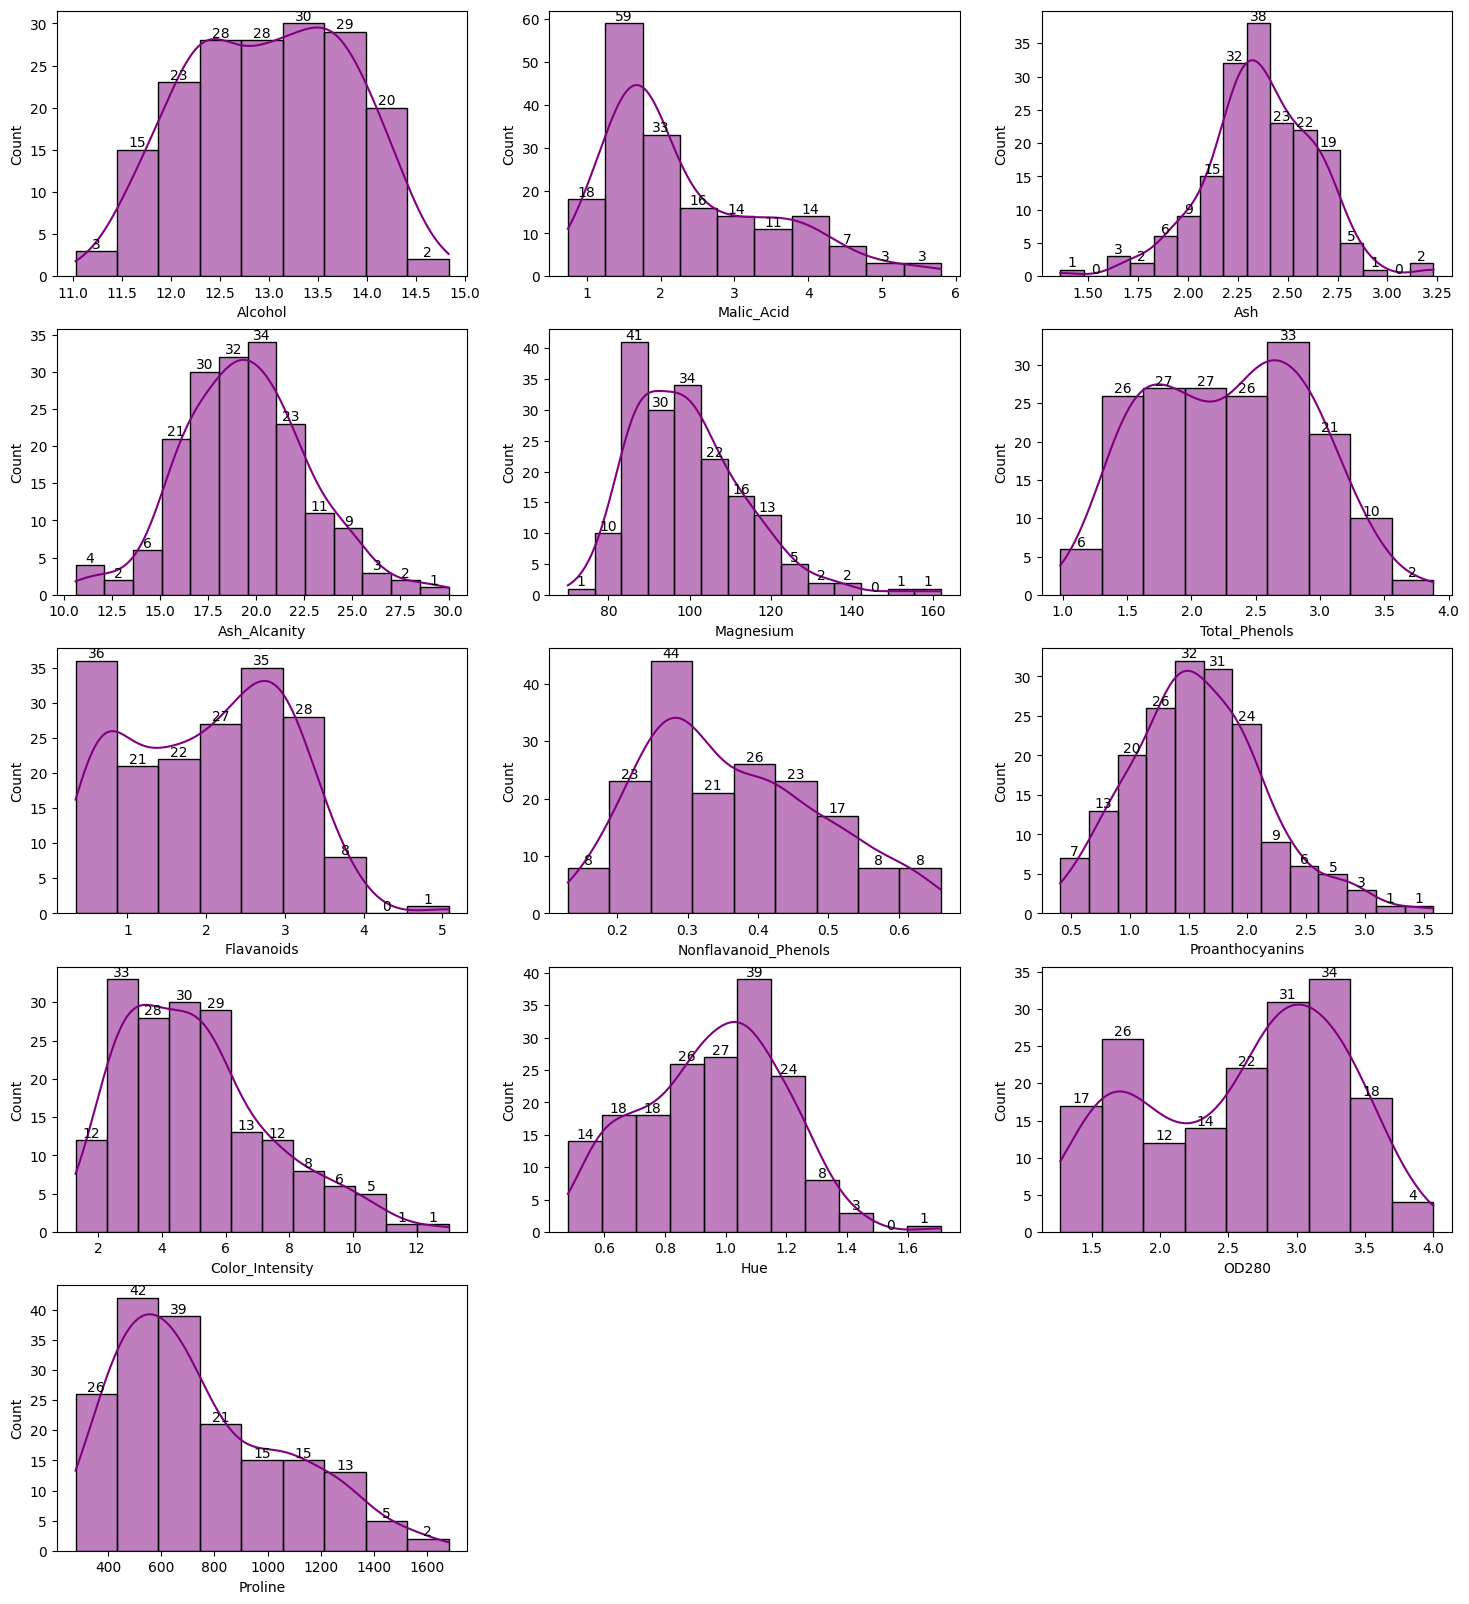

In [ ]:
# Distribution of the data
plot = 1
plt.figure(figsize=(18,20))
for i in data.columns:
    plt.subplot(5,3,plot)
    ax = sns.histplot(data = data , x = i , kde = True, palette="bright",color="purple" )
    plt.xlabel(i)
    plot+=1
    for i in ax.containers:     #to set a label on top of the bars.
        ax.bar_label(i,)

In [ ]:
normal_distributions = []
for col in data.columns:
    _, p = stats.normaltest(data[col])
    if p > 0.05: # 0.05 is usually used as the threshold for normality
        normal_distributions.append(col)
normal_distributions

['Ash_Alcanity', 'Hue']

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.


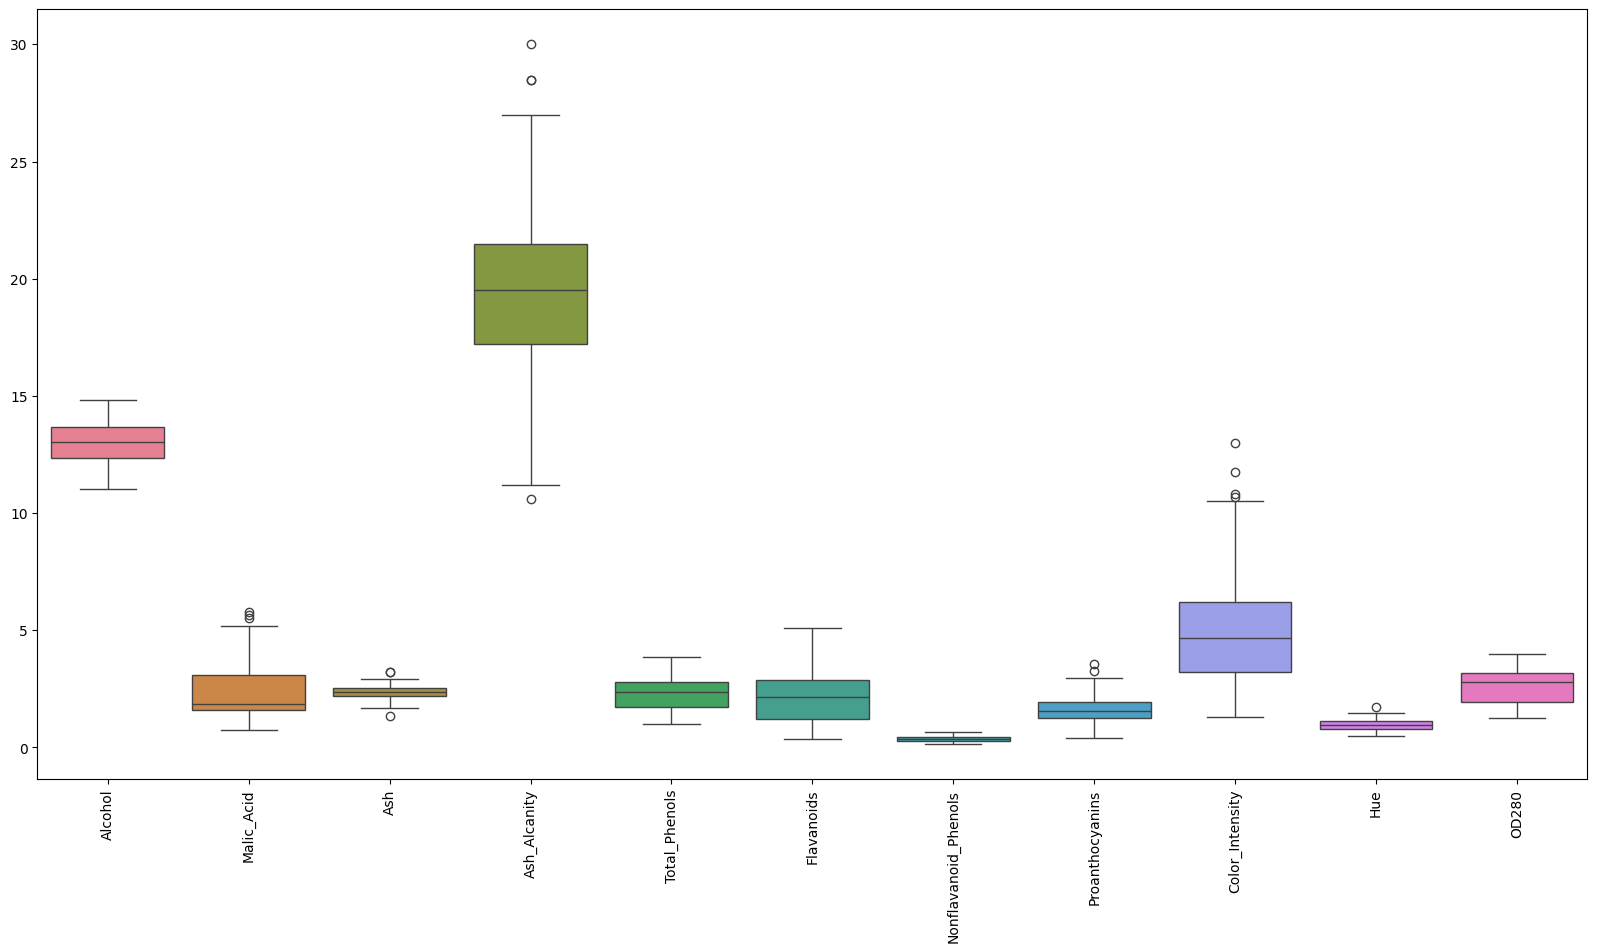

In [ ]:
# Outliers Detection
plt.figure(figsize=(20, 10))
sns.boxplot(data=data.drop(columns=['Proline', 'Magnesium'])) # Excluding Proline and Magnesium because of their large scale
plt.xticks(rotation=90)
plt.show()

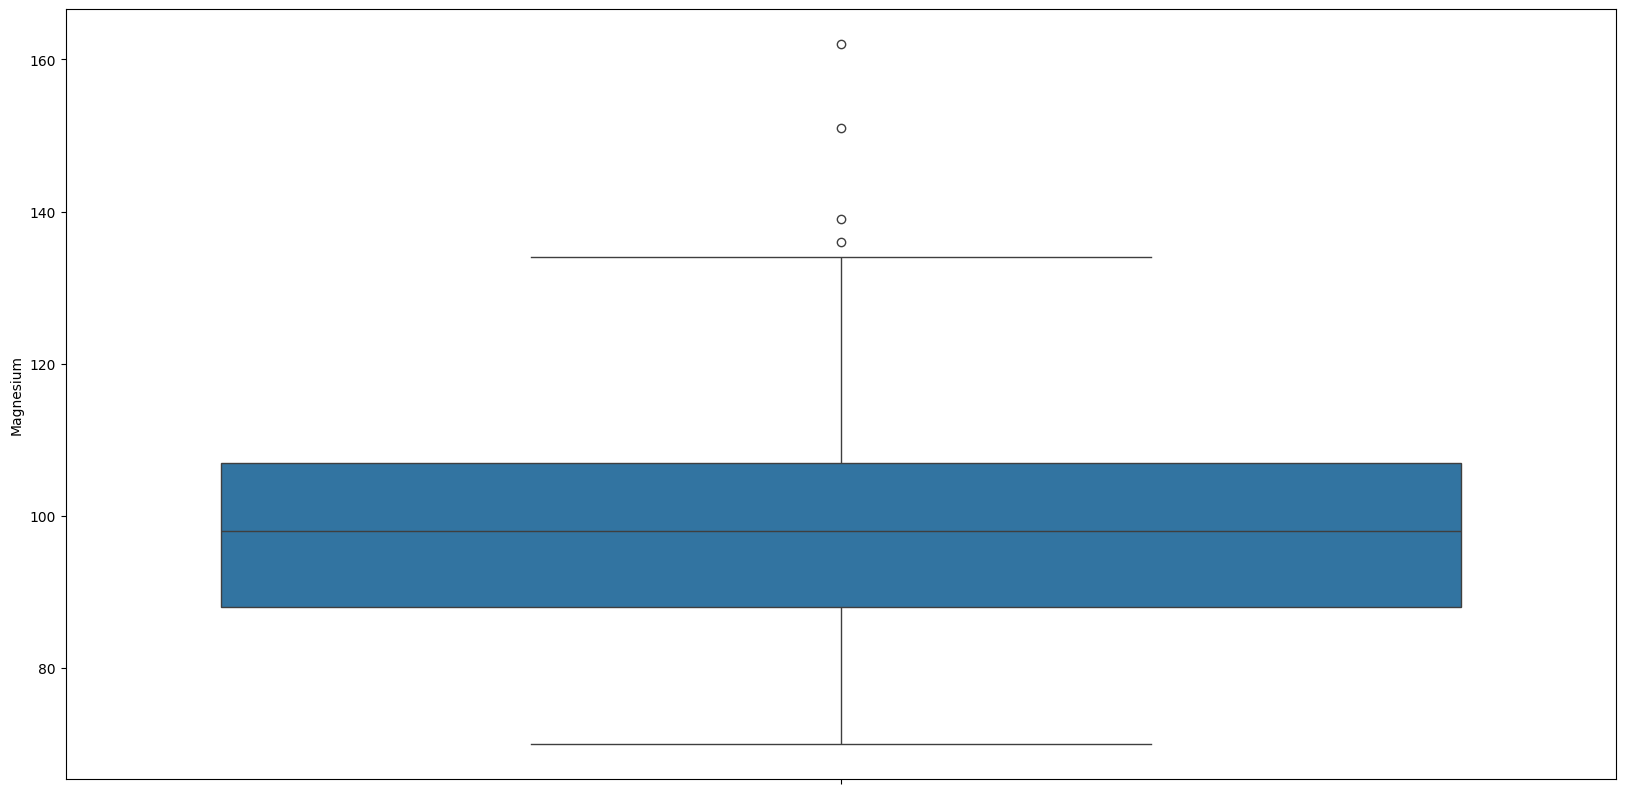

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=data['Magnesium'])
plt.xticks(rotation=90)
plt.show()

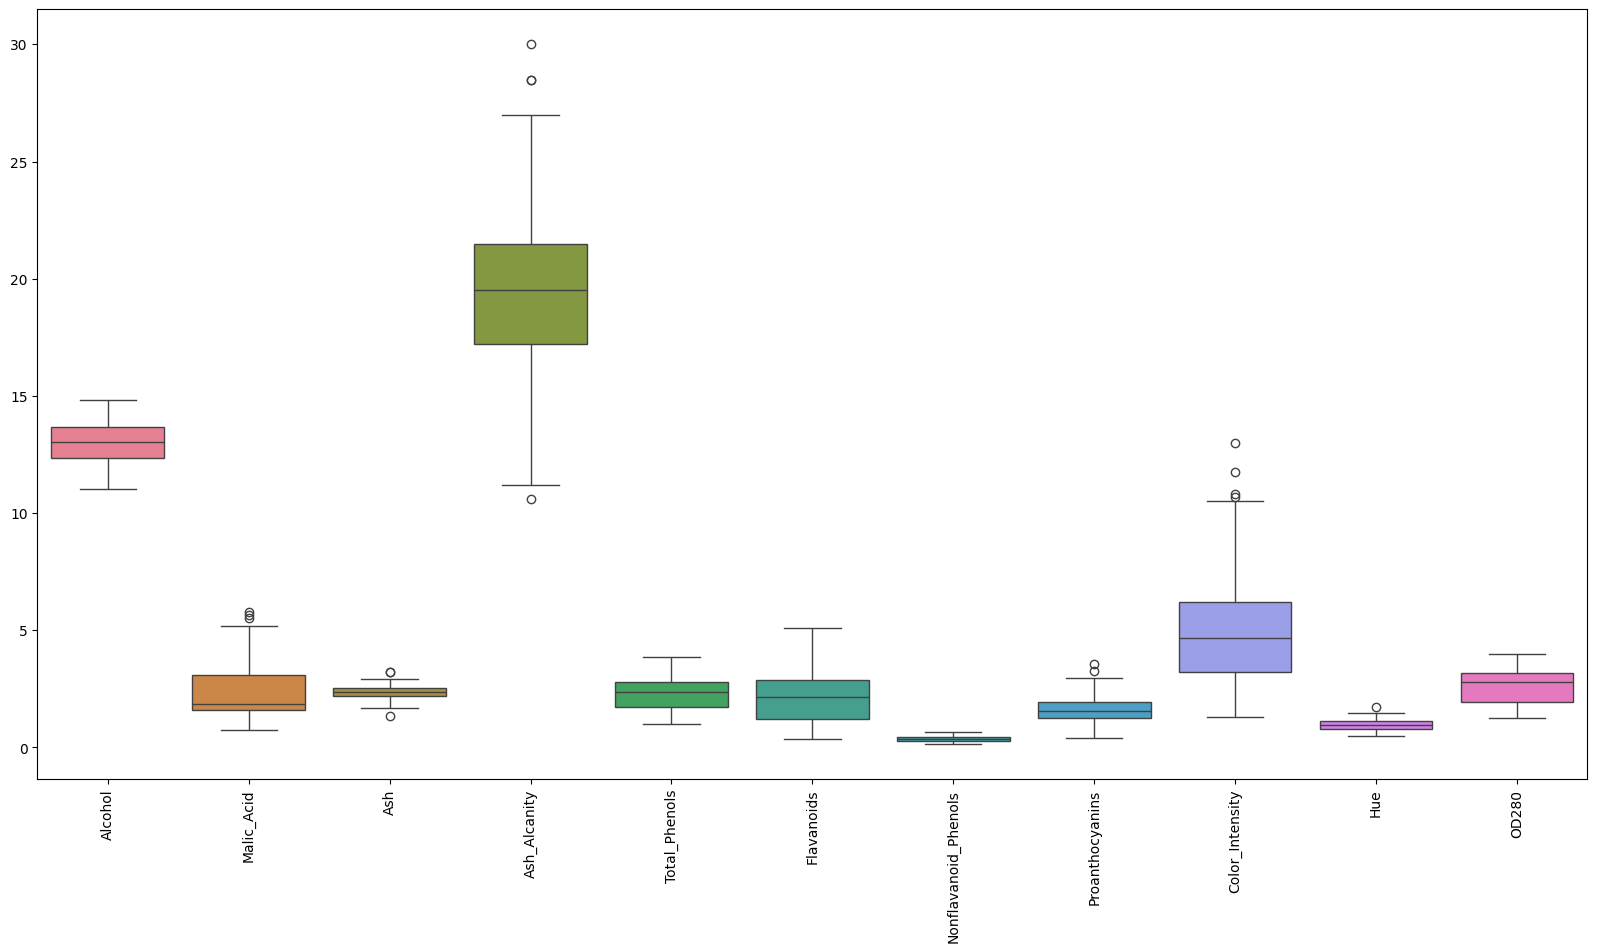

In [ ]:
# Removing outliers
z = np.abs(stats.zscore(data[['Hue', 'Ash_Alcanity']]))
df = data[(z < 3).all(axis=1)]

plt.figure(figsize=(20, 10))
sns.boxplot(data=data.drop(columns=['Proline', 'Magnesium']))
plt.xticks(rotation=90)
plt.show()

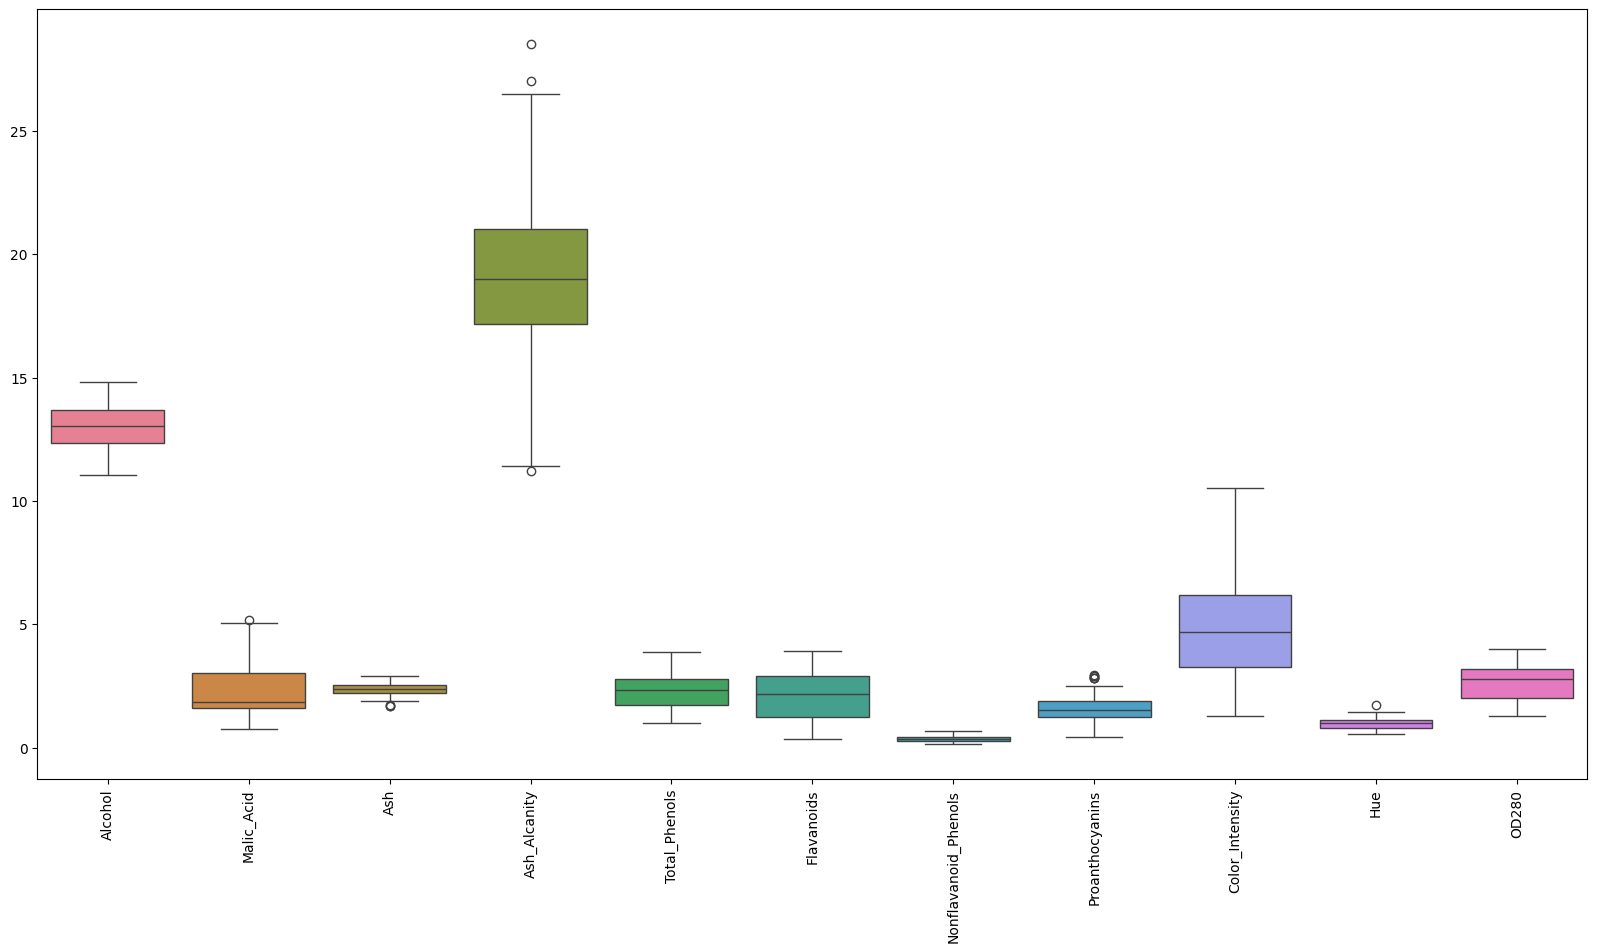

In [ ]:
df_excluded = data.drop(columns=['Hue', 'Ash_Alcanity'])
Q1 = df_excluded.quantile(0.25)
Q3 = df_excluded.quantile(0.75)
IQR = Q3 - Q1
df = data[~((df_excluded < (Q1 - 1.5 * IQR)) | (df_excluded > (Q3 + 1.5 * IQR))).any(axis=1)]

plt.figure(figsize=(20, 10))
sns.boxplot(data=df.drop(columns=['Proline', 'Magnesium']))
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Normalizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

df_scaled.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.490286,-0.567849,0.269756,-1.203040,2.323025,0.812989,1.038422,-0.656727,1.412041,0.310401,0.340501,1.836461,0.959728
1,0.221309,-0.500575,-0.930937,-2.632496,0.129112,0.573673,0.731267,-0.819907,-0.520973,-0.284616,0.385174,1.096675,0.913267
2,0.172029,0.056838,1.263433,-0.228410,0.210368,0.812989,1.222715,-0.493546,2.407257,0.329290,0.295828,0.769461,1.331420
3,1.662768,-0.337196,0.559578,-0.813188,1.185441,2.488199,1.478678,-0.983088,1.201515,1.330430,-0.463612,1.167808,2.245161
4,0.270590,0.277881,2.091497,0.551294,1.591721,0.812989,0.659598,0.240766,0.512520,-0.312950,0.340501,0.428022,-0.062424


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.

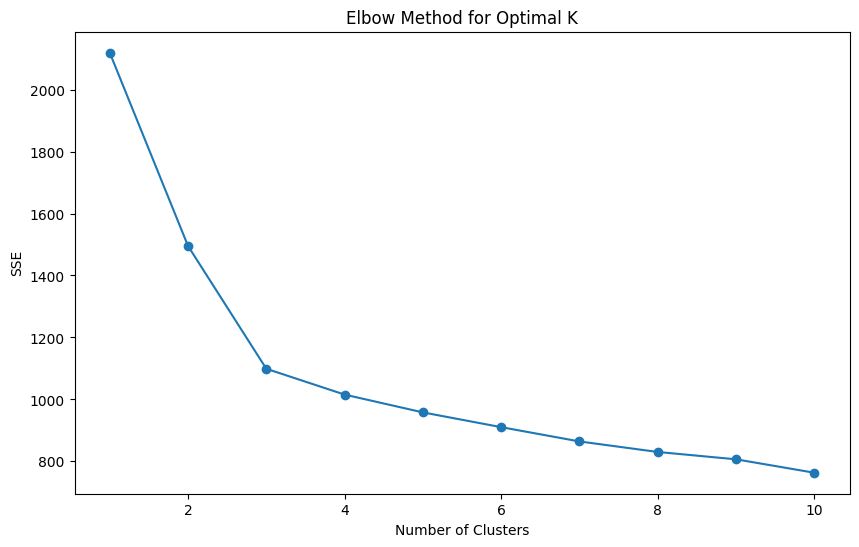

In [ ]:
# Determine the optimal number of clusters using the elbow method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal K')
plt.show()

From the above plot, the optimal number of clusters seems to be 3. This is because the inertia decreases significantly until 3 clusters, after which the decrease is less significant. To double check, I will also use the silhouette score.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_scaled)
df['cluster'] = kmeans.labels_

df.head()

<ipython-input-53-0883b7dc3cba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.labels_


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif.

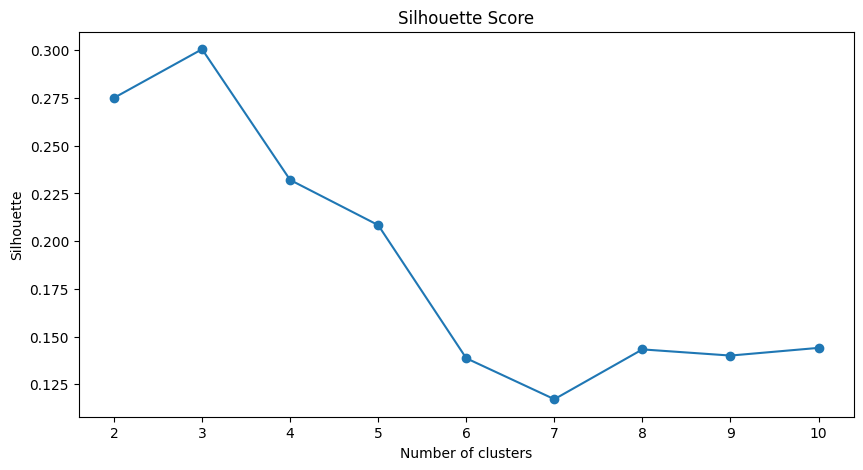

In [ ]:
silhouette = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_scaled)
    silhouette.append(silhouette_score(df_scaled, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')
plt.show()

In [ ]:
# Evaluate clustering performance with silhouette score
sil_score = silhouette_score(df_scaled, kmeans.labels_)
print(f'Silhouette Score: {sil_score:.2f}')

Silhouette Score: 0.30


## **c. Feature Selection (Opsional)**

In [ ]:
# PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

print(df_pca.head())

print("Ratio of explained variance: ", pca.explained_variance_ratio_)
print("Sum of explained variance: ", pca.explained_variance_ratio_.sum())

        PC1       PC2
0  3.491270  1.506600
1  2.272092 -0.263160
2  2.632328  0.820414
3  3.960497  2.596003
4  1.014678  0.960983
Ratio of explained variance:  [0.38361592 0.2082586 ]
Sum of explained variance:  0.5918745240487501


Explained Variance: PC1 explains approximately 38.4% of the total variance, while PC2 accounts for about 20.8%. Together, they explain around 59.2% of the total variance in the data.

This reduction implies that nearly 60% of the information from the original features is retained in these two components. While some details are inevitably lost, this 2D representation is valuable for visualizing clusters and underlying patterns, especially for exploratory analysis.


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.


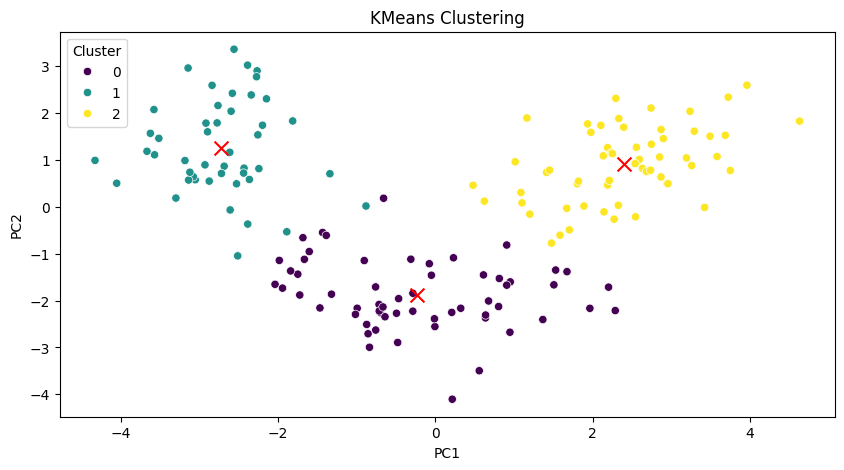

In [ ]:
# KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_scaled)
df_pca['Cluster'] = kmeans.labels_

centroids = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100)
plt.title('KMeans Clustering')
plt.show()

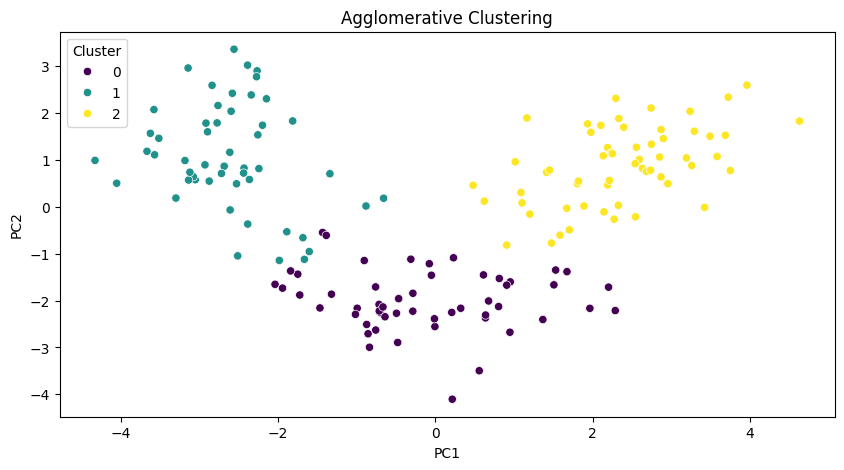

In [ ]:
# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
df_pca['Cluster'] = agg.fit_predict(df_scaled)

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('Agglomerative Clustering')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

In [ ]:
cluster_summary = df.groupby('cluster').mean()
cluster_summary

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
cluster,,,,,,,,,,,,,
0,12.229661,1.859831,2.265424,20.405085,90.677966,2.237966,2.085085,0.362542,1.591186,2.989492,1.070949,2.833559,499.677966
1,13.106087,3.233261,2.394565,20.919565,98.717391,1.660000,0.807826,0.450652,1.065000,6.808913,0.703913,1.701304,622.000000
2,13.756724,2.010000,2.442414,16.900000,106.034483,2.843793,2.987586,0.286897,1.898966,5.561897,1.060862,3.157069,1120.637931


## Cluster 0
*  Alcohol: Lower alcohol content (average 12.23).
*  Malic Acid: Moderate malic acid levels (average 1.86).
* Total Phenols and Flavanoids: Moderate phenolic content and flavanoid levels.
* Color Intensity: Lower color intensity (average 2.99).
* OD280/OD315: Moderate values, indicating decent antioxidant levels.
* Proline: Lower proline content (average 500).

This cluster could represent lighter, less intense wines, potentially suitable for consumers looking for wines with moderate acidity and phenolic content.


## Cluster 1
*   Alcohol: Moderate alcohol content (average 13.11).
* Malic Acid: Higher levels of malic acid (average 3.23).
* Total Phenols and Flavanoids: Lower values, indicating a potentially lighter body.
* Color Intensity: Highest color intensity (average 6.81).
* Hue: Lower hue values (average 0.70), possibly darker wines.
* Proline: Moderate proline content (average 622).

This cluster might represent wines with strong acidity and color intensity but a lighter body and lower antioxidant profile, perhaps suited to those who prefer more visually striking wines with pronounced acidity.

## Cluster 2
* Alcohol: Higher alcohol content (average 13.76).
* Malic Acid: Moderate malic acid levels (average 2.01).
* Total Phenols and Flavanoids: High values, suggesting a richer, more complex wine profile.
* Color Intensity: High (average 5.56), but lower than Cluster 1.
* OD280/OD315: Highest antioxidant levels (average 3.16).
* Proline: Highest proline content (average 1121).

This cluster likely represents fuller-bodied wines with high antioxidant levels and rich flavor complexity, potentially more appealing to consumers who enjoy robust, full-bodied wines.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
df.to_csv('wine_clustered.csv', index=False)